# Análisis Comparativo de Técnicas de Clustering para Segmentación de Canciones

### 1. Carga y Preparación de Datos
Cargamos el dataset, realizamos una limpieza exhaustiva y escalamos las características numéricas para el análisis.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carga y limpieza de datos
df = pd.read_csv('train.csv')
df.drop(columns=['type', 'song_name', 'uri', 'track_href', 'analysis_url', 'id', 'Id', 'Unnamed: 0', 'title', 'genre'], inplace=True, errors='ignore')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Escalado de características
features = df.select_dtypes(include=np.number)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### 2. Análisis Exploratorio de Datos (EDA)

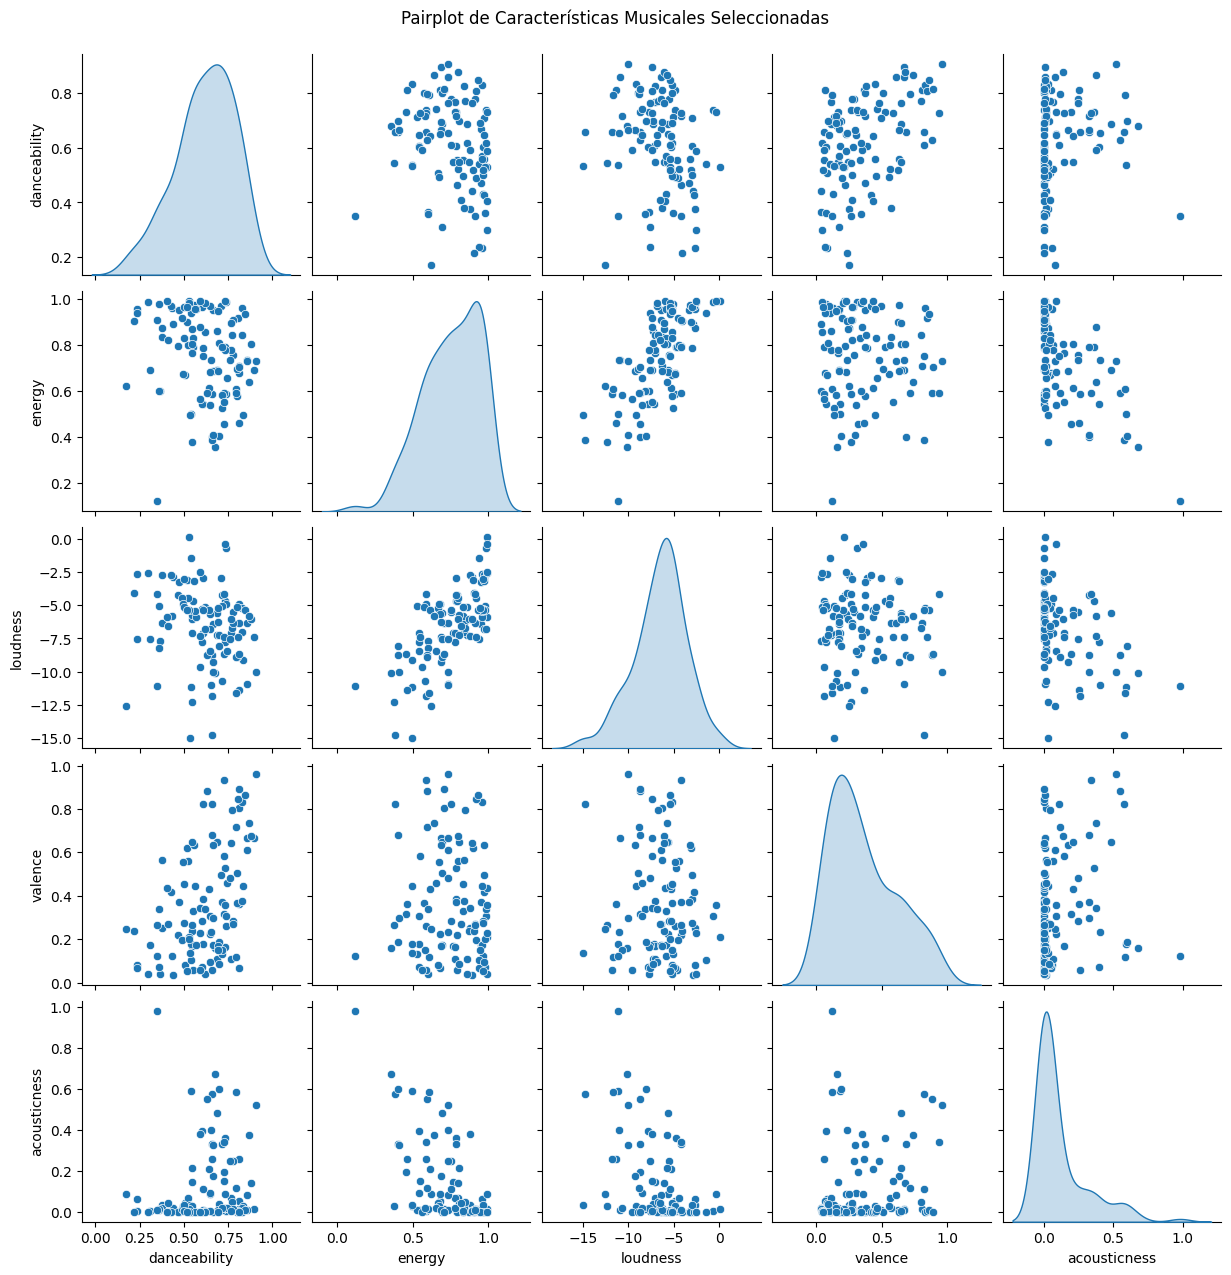

In [2]:
# Pairplot para visualizar relaciones entre algunas características clave
sns.pairplot(features[['danceability', 'energy', 'loudness', 'valence', 'acousticness']], diag_kind='kde')
plt.suptitle('Pairplot de Características Musicales Seleccionadas', y=1.02)
plt.show()

### 3. Modelado y Comparación de Algoritmos de Clustering

#### 3.1. K-Means Clustering

C:\Users\capor\AppData\Local\Temp\ipykernel_2624\1398606287.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K_range, inertia, 'bx-', color='blue')


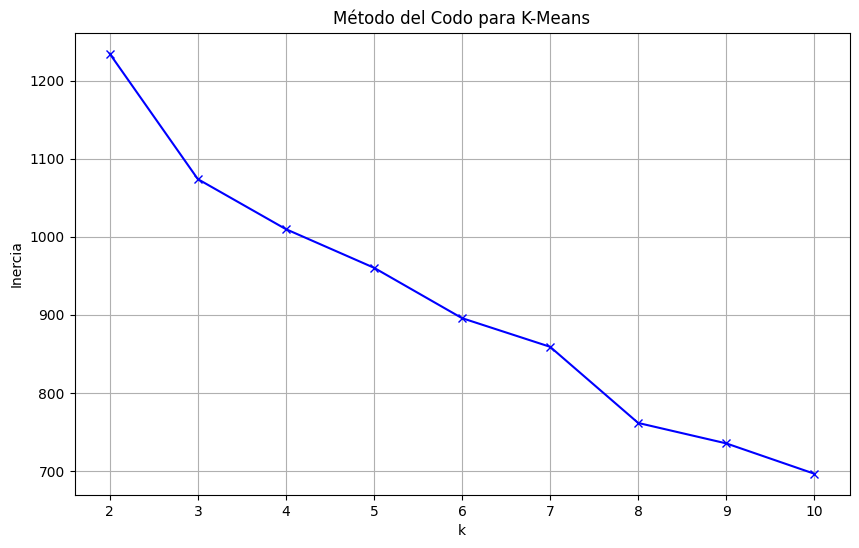

In [3]:
# Encontrar k óptimo con el método del codo
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(scaled_features)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bx-', color='blue')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-Means')
plt.grid(True)
plt.show()

In [4]:
# Entrenar K-Means con k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(scaled_features)

#### 3.2. Clustering Jerárquico Aglomerativo

In [5]:
agglomerative = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(scaled_features)

#### 3.3. DBSCAN

In [6]:
dbscan = DBSCAN(eps=2.5, min_samples=15)
dbscan_labels = dbscan.fit_predict(scaled_features)

### 4. Visualización de Clusters con PCA

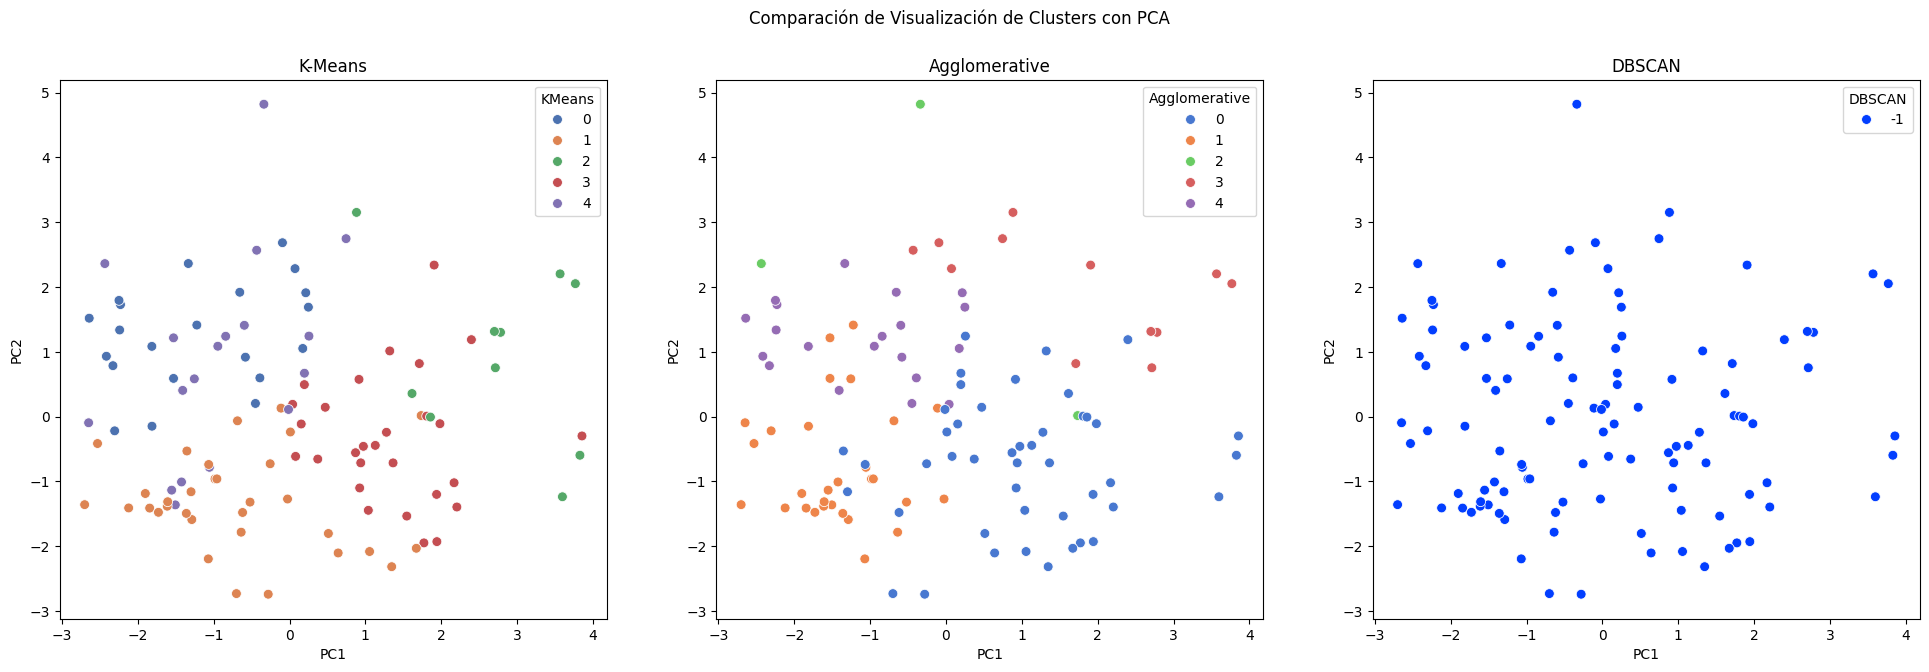

In [8]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['KMeans'] = kmeans_labels
pca_df['Agglomerative'] = agglomerative_labels
pca_df['DBSCAN'] = dbscan_labels

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 7))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans', data=pca_df, palette='deep', ax=ax1, s=50).set_title('K-Means')
sns.scatterplot(x='PC1', y='PC2', hue='Agglomerative', data=pca_df, palette='muted', ax=ax2, s=50).set_title('Agglomerative')
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN', data=pca_df, palette='bright', ax=ax3, s=50).set_title('DBSCAN')
plt.suptitle('Comparación de Visualización de Clusters con PCA')
plt.show()

### 5. Evaluación Comparativa de Modelos

In [11]:
# Función para evaluar y mostrar métricas
def evaluate_clustering(features, labels, model_name):
    dbscan_mask = labels != -1
    if np.sum(dbscan_mask) > 1:
        silhouette = silhouette_score(features[dbscan_mask], labels[dbscan_mask])
        calinski = calinski_harabasz_score(features[dbscan_mask], labels[dbscan_mask])
        davies = davies_bouldin_score(features[dbscan_mask], labels[dbscan_mask])
        print(f'--- {model_name} ---')
        print(f'Silhouette Score: {silhouette:.3f}')
        print(f'Calinski-Harabasz Score: {calinski:.3f}')
        print(f'Davies-Bouldin Score: {davies:.3f}')
    else:
        print(f'No se pudo evaluar {model_name} (solo se encontró un cluster o ruido).')

evaluate_clustering(scaled_features, kmeans_labels, 'K-Means')
evaluate_clustering(scaled_features, agglomerative_labels, 'Agglomerative Clustering')
evaluate_clustering(scaled_features, dbscan_labels, 'DBSCAN')

--- K-Means ---
Silhouette Score: 0.110
Calinski-Harabasz Score: 12.364
Davies-Bouldin Score: 2.022
--- Agglomerative Clustering ---
Silhouette Score: 0.127
Calinski-Harabasz Score: 14.140
Davies-Bouldin Score: 1.716
No se pudo evaluar DBSCAN (solo se encontró un cluster o ruido).
